In [1]:
%matplotlib inline
import graphs10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sequence = graphs10.random_sequence(1000) 
lrs = [i for i in range(10, 101)]

vs = []
es = []

for lr in lrs:
    spectrum = graphs10.spectrum(sequence, lr)
    graph = graphs10.spectrum_2_graph(spectrum)

    vs.append(len(graph))

    n_edges = 0
    for u in graph:
        for v in graph[u]:
            n_edges += len(graph[u][v])

    es.append(n_edges)

factor = [n_e / (n_v * (n_v - 1)) for n_e, n_v in zip(es, vs)]

print(vs[:25])
print(es[:25])


[989, 991, 990, 989, 988, 987, 986, 985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974, 973, 972, 971, 970, 969, 968]
[991, 990, 989, 988, 987, 986, 985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974, 973, 972, 971, 970, 969, 968, 967]


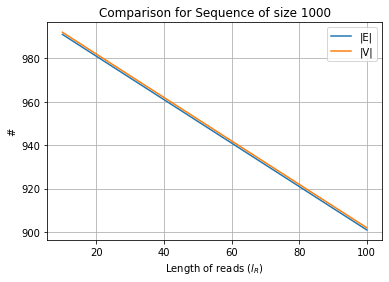

In [3]:
plt.title("Comparison for Sequence of size 1000")
plt.xlabel("Length of reads ($l_{R}$)")
plt.ylabel("#")
plt.grid(True)
plt.plot(lrs, es, lrs, vs)
plt.legend(['|E|', '|V|'])
plt.savefig('graph1.png', transparent=False)

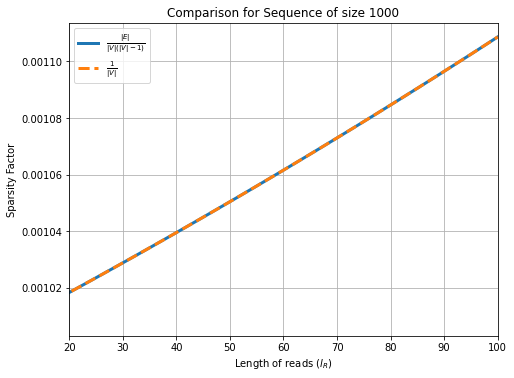

In [4]:
plt.figure(figsize=(7.68,5.76))
plt.title("Comparison for Sequence of size 1000")
plt.xlabel("Length of reads ($l_{R}$)")
plt.ylabel("Sparsity Factor")
plt.grid(True)
plt.plot(lrs, factor, lw=3)
plt.plot(lrs, [1 / x for x in vs], '--', lw=3)
plt.xlim([20, 100])
plt.legend(['$\\frac{|E|}{|V|(|V|-1)}$', '$\\frac{1}{|V|}$'])
#plt.ylim([0, 1])
plt.savefig('graph2.png')

In [5]:
sequences = [graphs10.random_sequence(1000) for i in range(10)] 
lrs = [i for i in range(10, 101)]

vs_runs = []
es_runs = []

for sequence in sequences:
    vs = []
    es = []
    for lr in lrs:
        spectrum = graphs10.spectrum(sequence, lr)
        graph = graphs10.spectrum_2_graph(spectrum)

        vs.append(len(graph))

        n_edges = 0
        for u in graph:
            for v in graph[u]:
                n_edges += len(graph[u][v])

        es.append(n_edges)
        
    vs_runs.append(vs)
    es_runs.append(es)
    
factor = np.zeros(len(vs_runs[0]))
    
for r in range(10):
    factor += np.array([n_e / (n_v * (n_v - 1)) for n_e, n_v in zip(es_runs[r], vs_runs[r])])

factor /= 10


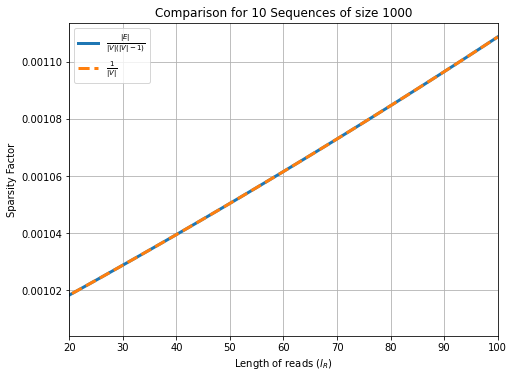

In [6]:
plt.figure(figsize=(7.68,5.76))
plt.title("Comparison for 10 Sequences of size 1000")
plt.xlabel("Length of reads ($l_{R}$)")
plt.ylabel("Sparsity Factor")
plt.grid(True)
plt.plot(lrs, factor, lw=3)
plt.plot(lrs, [1 / x for x in vs], '--', lw=3)
plt.xlim([20, 100])
plt.legend(['$\\frac{|E|}{|V|(|V|-1)}$', '$\\frac{1}{|V|}$'])
#plt.ylim([0, 1])
plt.savefig('graph3.png')